7.24 Morphing between two discrete distributions

(a) linear interpolation

(b)(c)(d)

In [1]:
import numpy as np
import cvxpy as cp
from matplotlib import pyplot as plt

In [2]:
N = 10
n = 100

q = [ (np.exp(-(i-30)**2 / 100 ) + 2*np.exp(-(i-68)**2 / 100)) for i in range(1,101)]
q = np.array(q)
r = np.array([np.exp(-(i - 50)**2 / 100) for i in range(1,101)])

q = q/sum(q)
r = r/sum(r)

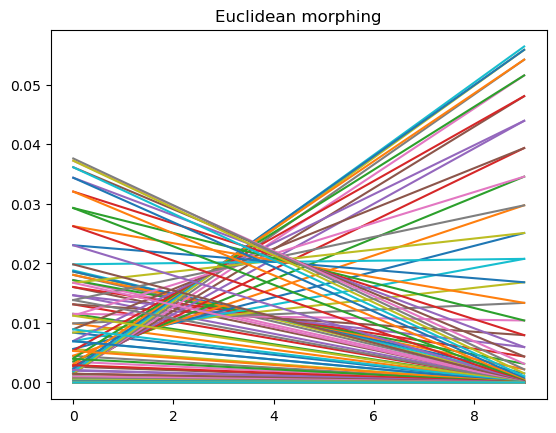

In [9]:
p = cp.Variable((N,n), nonneg=True)
objective = cp.Minimize(cp.sum_squares(p[1:]-p[:-1]))
constraints = [
    cp.sum(p, axis=1) == 1,
    p[0] == q,
    p[-1] == r
]
prob = cp.Problem(objective, constraints)
result = prob.solve()
plt.plot(p.value)
plt.title('Euclidean morphing')
plt.show()

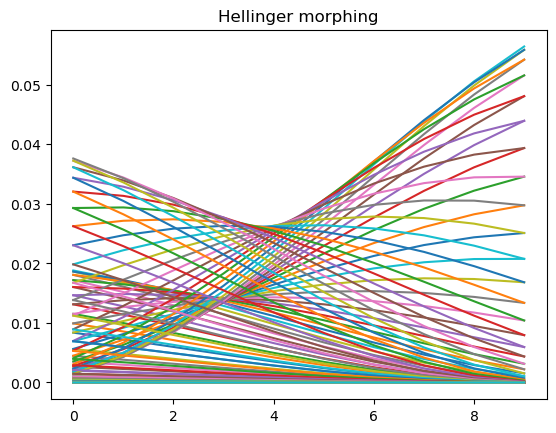

In [72]:
p = cp.Variable((N,n), nonneg=True)
objective = cp.Maximize(
    cp.sum(
        [
            cp.geo_mean(x) 
            for x in cp.vstack(
            (cp.reshape(p[1:], ((N-1)*n,)),
            cp.reshape(p[:-1], ((N-1)*n,)))).T
        ]
    )
)
constraints = [
    cp.sum(p, axis=1) == 1,
    p[0] == q,
    p[-1] == r
]
prob = cp.Problem(objective, constraints)
result = prob.solve()
plt.plot(p.value)
plt.title('Hellinger morphing')
plt.show()

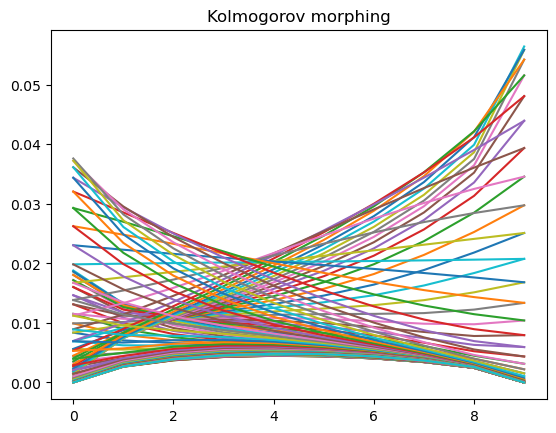

In [31]:
p = cp.Variable((N,n), nonneg=True)
objective = cp.Minimize(cp.sum(cp.norm(cp.cumsum(p[1:]-p[:-1],axis=1), np.inf, axis=1)))
constraints = [
    cp.sum(p, axis=1) == 1,
    p[0] == q,
    p[-1] == r
]
prob = cp.Problem(objective, constraints)
result = prob.solve()
plt.plot(p.value)
plt.title('Kolmogorov morphing')
plt.show()